In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Lab 5 -- Nebular HII regions

In this lab we will explore the physics of photoionized regions, which are seen surrounding newly formed stars or white dwarfs.

### 1. Strömgren sphere of ionized gas surrounding a massive star

Consider a newly formed massive star radiating a total ionizing ($h\nu > 13.6 \, \rm eV$) photon rate of $Q_*$, which is surrounded by a medium with hydrogen number density $n_H$. 

Assume that within some spherical volume (the "Strömgren sphere"), the hydrogen atoms absorb (and are ionized by) every single one of these photons, resulting in an entirely ionized gas, while outside of this volume the gas is entirely neutral. By setting the ionization and recombination rates equal within that volume, calculate its radius $R_{\rm st}$ (the "Strömgren radius"). 

$[\textit{Hint: } \textrm{What are the units of Q? What about the units of recombination rate? If every photon in the inner region results in an ionization what is the ionization rate?]}$

Like in the pre-lab video, you can write the result in terms of the hydrogen recombination coefficient, $\alpha_H$. Do your scalings of the Strömgren radius with $Q_*$ and $n_H$ make sense?

Ionization rate: 

$$ R_{ion} = \frac{Q_*}{4\pi r^2 c} n_h \sigma_{\nu} c = \frac{3Q_*}{4\pi r^3}$$

and recombination rate:
 
$$ R_{rec} = n_e^2\alpha $$

where for the ionization rate I've taken advantage of the fact that every ionizing photon must have been "absorbed" within this volume if the second region has no ionization rate, and likewise we assume everything recombines by the time we reach the boundary between the spheres (thus x = 1 for the recombination rate calculation), going from x = 1 to x = 0 sharply at the Stromgren radius. Setting these rates equal and solving for $r$ (and noting that each electron corresponds to what was a single hydrogen) we have:

$$ R_S = (\frac{3Q_*}{4\pi n_h^2 \alpha})^{1/3} $$

These scalings should make sense intuitively -- as the number of ionizing photons available per unit time increases the ionized region expands, and as the number density increases it conversely decreases.

### 2. Typical size of a photoionized nebula

Assuming a star of effective (surface) temperature $T = 3\times10^4$ K and radius $R = 4\times10^{11}$ cm, use the approximate expression from the pre-lab video to calculate the integrated ionizing photon rate $Q_*$ for hydrogen, with ionization energy of $h \nu_i = 13.6$ eV.

Then assuming $n_H = 10^2 \, \rm cm^{-3}$ and $\alpha_H = 3.3\times10^{-13} \, \rm cm^3 \, \rm s^{-1}$, calculate the Strömgren radius. How large is the ionized nebula compared to the size of the massive star? How about compared to the width of a Galactic spiral arm of $\simeq 1$ kpc?

In [2]:
π = np.pi; R = 2e9; k = 1.38e-23; h = 6.636e-34; c = 3e8; T = 3e4 #SI
ui = 13.6*1.6e-19/(k*T)
Q = 8*π**2*R**2/c**2*(k*T/h)**3*np.exp(-ui)*(2+2*ui+ui**2) #s^-1
print("total ionizing photon rate Q* = {:.2g} [γ/s]".format(Q))
α = 3.3e-13 
n = 1e2
R_S = (3*Q/(4*π*(n)**2*α))**(1/3) #cm
print("R_S = {0:.2g} cm AKA {1:.2g} x radius of largest stars AKA {2:.2g} x the width of galactic arm"
      .format(R_S,R_S/(1000*7e10),(R_S/3.086e21))) #largest stars have radii ~1000 R_sun

total ionizing photon rate Q* = 1.8e+47 [γ/s]
R_S = 2.3e+18 cm AKA 3.4e+04 x radius of largest stars AKA 0.00076 x the width of galactic arm


### 3. Thickness of the transition from ionized to neutral

The thickness of the boundary where the gas goes from nearly fully ionized to neutral can be estimated as the mean free path of an ionizing photon in the neutral region. Using $\sigma_0 = 6.3 \times 10^{-18} \, \rm cm^2$, calculate this width and compare with your value of $R_{\rm st}$ from part 2.

How does the result compare to the assumption above of a very sharp transition from fully ionized to neutral gas?


In [3]:
l = 1/(6.3e-18*n)
print("mean free path = {0:.2g} cm AKA {1:.2g} x Stromgren radius".format(l,l/R_S))

mean free path = 1.6e+15 cm AKA 0.00068 x Stromgren radius



Since the mean free path is about 1000 times smaller than the Stromgren radius, we would expect the transition to be pretty sharp and our assumption is a pretty good one. The plots below show this nicely!

### 4. Relative size of hydrogen and helium ionization zones

Using the Strömgren sphere model, calculate the ratio of the radius of a helium to hydrogen ionization zone in terms of their relative number of ionizing photons $Q_{\rm H}$ and $Q_{\rm He}$ and composition parameters $X$ and $Y$.

Calculate this ratio for the first ionization state of helium for the assumed massive star properties above, with $n_H = 10^2$ cm$^{-3}$, $X = 3/4$, $Y = 1/4$, and noting that the ionization energy is $h \nu_i = 24.6$ eV.

the ratio $X/Y = 3$, but this is by mass so 3 times more hydrogens by mass corresponds to 12 times as many H atoms compared to He atoms (He is 4x heavier) -- so $n_{\rm He} = \frac{n_\rm H}{12}$. The other quantity that we need to change is $u_i$, which is now larger because of the increased ionization energy. If we make these substitutions we can write that the new radius as: $$R_S (\rm He) = R_S(\rm H) \times [12 e^{u_i(\rm H) - u_i(\rm He)} \frac{2 + 2u_i(\rm He) + u_i(\rm He)^2}{2 + 2u_i(\rm H) + u_i(\rm H)^2}]^{1/3} $$

Note that we *don't* need to know the $\alpha$ value for He since we've re-written everything in terms of H (ie in the ratio of H/He the both have $\alpha n_{\rm H}^2$ in the denominator) Also note there's just one factor of 12 in the final result in the numerator (as opposed to $12^2$) -- recall the recombination rate in its "pure" form is $n_en_Hx\alpha$ where x = 1 and originally we said $n_e = n_H$, but this is not the case for He. Most of the electrons are still coming from the ionized Hydrogen, so in this case the recombination rate will be $\approx n_Hn_{He}\alpha = n_H(\frac{n_H}{12})\alpha$.

In [4]:
ui_He = 24.6*1.6e-19/(k*T)
R_S_He = R_S*(12*np.exp(ui-ui_He)*((2+2*ui_He+ui_He**2)/(2+2*ui+ui**2)))**(1/3)
print("R_S for He = {0:.2g} cm and the ratio of R_S for H/He = {1:.2g}".format(R_S_He,R_S/R_S_He))

R_S for He = 1.8e+18 cm and the ratio of R_S for H/He = 1.3


### 5. Comparison to output from a numerical calculation with the Cloudy code

Compare your results with the same problem as run using the Cloudy photoionization code, which tracks in detail the ionization state and temperature of the nebula. 

1) Fill in your values for the Strömgren radius below to plot your expected locations for a drop from full to zero ionization on the plot below.

2) How well does the Strömgren sphere assumption work?

Surprisingly well!

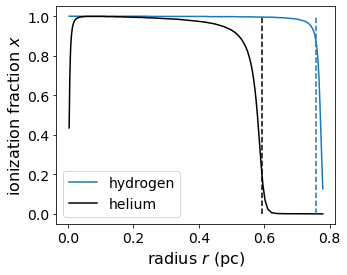

In [5]:
# FILL IN YOUR VALUES FOR RSTROM HERE
# rstrom_H = HYDROGEN VALUE
# rstrom_He = HELIUM VALUE
rstrom_H = R_S
rstrom_He = R_S_He
# load Cloudy output data
r,xH,xHe,xHe2 = np.load('cloudy_hii_example_Rx.npy')

# make a plot of ionization fractions
plt.figure(figsize=(5,4))
plt.plot(r/3.09e18,xH,label='hydrogen',color='C0')
plt.plot(r/3.09e18,xHe,label='helium',color='k')
plt.plot(rstrom_H/3.09e18+np.zeros(50),np.arange(50)/49.,color='C0',linestyle='--')
plt.plot(rstrom_He/3.09e18+np.zeros(50),np.arange(50)/49.,color='k',linestyle='--')
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.xlabel('radius $r$ (pc)',fontsize=16); plt.ylabel(r'ionization fraction $x$',fontsize=16)
plt.legend(frameon=True,fontsize=14)

### 6. Nebular spectrum

Cloudy also calculates the observed spectrum from the nebula, including both the initial stellar spectrum (here a Planck spectrum $B_\nu (T)$ with $T = 3\times10^4$ K) and the additional radiation from the ionized gas in the nebula.

What are the major differences between the incident (stellar) spectrum, and the observed one from the entire nebula? Why is the high energy flux of the star greatly reduced in the observed spectrum? Where did that energy go?

Comment on any radiation processes (emission or absorption) that you think might be contributing to the shape of the observed nebula spectrum.

The major difference is that the nebula spectrum does *not* look much like the underlying blackbody spectrum (for reasons we've discussed previously) with peaks mostly near resonant transitions in the gas (caused by the aborption of a photon of the right energy followed by corresponding relaxation). For energies greater than the ionization energy we don't see any emission in the nebular spectrum because there are no more transitions! I.e. for a frequency near $10^{16}$ Hz the energy would be ~60eV which is much greater than the ionization energy for hydrogen or helium. Correspondingly the stellar flux drops off there because most of the energy is "going" into creating the HII region and maintaining that higher baseline!

(1000000000000.0, 2e+16)

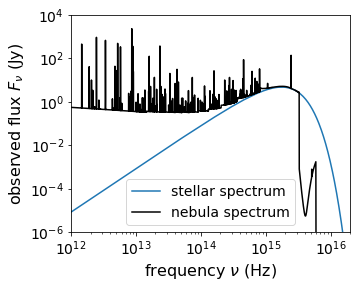

In [6]:
# load Cloudy output data
nu,Fnu_trans,Fnu_diff,Fnu_inc = np.load('cloudy_hii_example_spec.npy')

# make a plot of the stellar (blue) and observed (black) spectra
plt.figure(figsize=(5,4))
plt.loglog(nu,Fnu_inc,label='stellar spectrum',color='C0')
plt.loglog(nu,Fnu_trans,label='nebula spectrum',color='k')
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.xlabel(r'frequency $\nu$ (Hz)',fontsize=16); plt.ylabel(r'observed flux $F_\nu$ (Jy)',fontsize=16)
plt.legend(frameon=True,fontsize=14)
plt.ylim(1e-6,1e4); plt.xlim(1e12,2e16)